---


# Simulating the Jump Diffusion Process

---




### Merton Jump diffusion model

In the jump diffusion model the volatility is coupled to a standard weiner process but then there jumps that occur in the stock price that are coupled to some poisson process

$$
dS_t = \mu S_t dt + \sigma S_t dW_t + (J-1)S_{t^{-}}dN_t
$$

$N_t$ corresponds to the poisson proces where the differential is given by 

$$
dN_t = 1 \hspace{2cm} P(1) = \lambda dt 
$$

$$
dN_t = 0\hspace{2cm} P(0) = 1 - 
 \lambda dt 
$$


Now the Question remains how do we model $J$ ? 

From the structure of the equation, a constraint on $J$ is that it must be bounded between $[0,1]$, Hence it cannot be normally distributed. Hence we can make the $\ln(J)$ to be normally distributed 
$$
\ln(J) = \cal{N} (\alpha,\beta^2)
$$

In [65]:
import numpy as np 
import matplotlib.pyplot as plt
import random

def simulate_jump_merton(l,alpha,beta,mean,vol,T,N,S0):
    dt = T/N
    S = np.zeros(N+1)
    S[0] = S0
    for i in range(1,N+1):
        Z = np.random.normal()
        U = np.random.uniform(0,1)
        if U < l*dt:
            Y = np.random.normal(alpha,beta)
            J = np.exp(Y)
            j_p = (J-1)*S[i-1]
        else:
            j_p = 0
        S[i] = S[i-1] + mean*S[i-1]*dt + vol*S[i-1]*np.sqrt(dt)*Z + j_p
        #St1 = St*np.exp((mean - vol**2/2)*dt + vol*np.sqrt(dt)*Z)
    return S

def simulate_j_m_path(n_pathsl,l,alpha,beta,mean,vol,T,N,S0):
    S_paths = []
    for j in range(n_paths):
        S = simulate_jump_merton(l,alpha,beta,mean,vol,T,N,S0)
        S_paths.append(S)
    return S_paths


def mean_paths(S_path,S0):
     # Ensure S_path is a NumPy array
    S_path = np.array(S_path)
    
    # Calculate mean and variance at each time step across all paths
    mean_over_time = np.mean(S_path, axis=1)      # Mean across paths for each time step
    variance_over_time = np.var(S_path, axis=1)  # Variance across paths for each time step
    
    # Calculate overall mean across all time steps and paths
    S_m = np.mean(mean_over_time)
    S_var = np.mean(variance_over_time)             # Average variance across paths
    
    # Calculate relative statistics
    rel_S = (S_m - S0) / S0                    # Relative mean change
    rel_S_var = S_var / (S0**2)                # Relative variance
    return S_m, rel_S, mean_over_time, rel_S_var


The Empherical value::  0.15568037610714142
The mean of variance of each path ::  0.08696425919632227


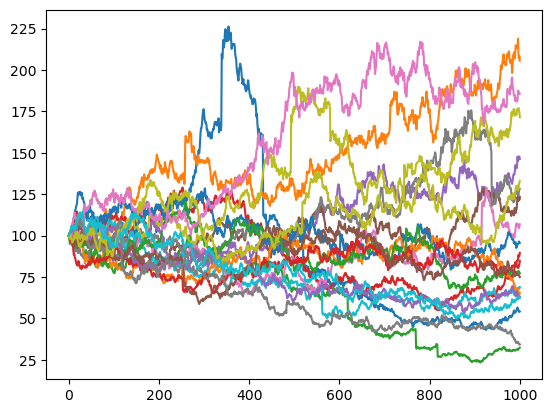

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Initial Parameters
S0 = 100          # Initial asset price
mu = 0.05         # Drift coefficient (5% annual return)
sigma = 0.20      # Volatility (20% annual)
lambda_jump = 0.3 # Jump intensity (0.1 jumps/year)
alpha = 0.0      # Mean of log jump sizes (-10%)
beta = 0.2        # Std dev of log jump sizes (20%)
n_paths = 4000

# Simulation Parameters
T = 5.0           # Total time in years
N = 1000           # Number of time steps (daily)
dt = T / N        # Time step size

S_path = simulate_j_m_path(n_paths,lambda_jump,alpha,beta,mu,sigma,T,N,S0)

S_m, rel_S, mean_over_time, rel_S_var = mean_paths(S_path,S0)
print("The Empherical value:: ",rel_S)
print("The mean of variance of each path :: ",rel_S_var)

for i in range(20):
    plt.plot(S_path[i])
